# Desafio 2.1.

Construa um classificador e identifique quais variáveis exercem maior impacto sobre o “target” e informe o porquê interpretando os resultados obtidos. 

métricas: precision, recall e F1-score;

dados: classification_data.zip;

#### Bibliotecas que vamos precisar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
db_train = pd.read_csv('classification_train.csv')

# Verificando a database

In [3]:
db_train.sample(4)

,x1,x2,target
359,0.514252,0.757333,0
249,1.701474,0.702734,1
605,0.161571,0.911402,0
272,0.782729,-0.624039,1


In [4]:
db_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      670 non-null    float64
 1   x2      670 non-null    float64
 2   target  670 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 15.8 KB


In [5]:
db_train.isna().sum().sum()

0

In [6]:
db_train.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 670 entries, 0 to 669
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      670 non-null    float64
 1   x2      670 non-null    float64
 2   target  670 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 20.9 KB


In [7]:
db_train.describe()

,x1,x2,target
count,670.000000,670.000000,670.000000
mean,0.481824,0.262611,0.505970
std,0.914772,0.615023,0.500338
min,-1.939767,-1.313970,0.000000
25%,-0.169615,-0.159189,0.000000
50%,0.492489,0.275538,1.000000
75%,1.159680,0.717589,1.000000
max,2.590410,1.904169,1.000000


In [8]:
# Aqui podemos observar que as duas variaveis mantem um grado significativo de impacto sobre o target, com a variavel x2 tendo um impacto mayor.
# Mas vamos a ver melhor com resultados empiricos logo de utilizar um modelo de machine learning
db_train.corr()

,x1,x2,target
x1,1.000000,-0.341515,0.507342
x2,-0.341515,1.000000,-0.650096
target,0.507342,-0.650096,1.000000


Ja que aparentemente a db está bem distribuida

array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>],
       [<AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

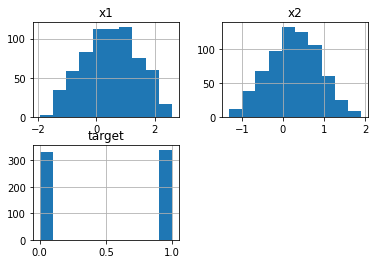

In [9]:
db_train.hist()

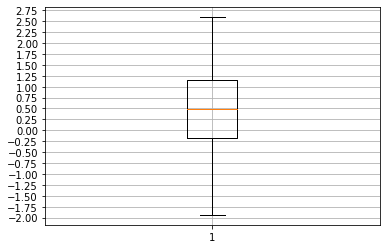

In [10]:
plt.yticks(np.arange(-3,3,0.25))
plt.grid(True)
plt.boxplot(data=db_train,x=db_train.x1)
plt.show()

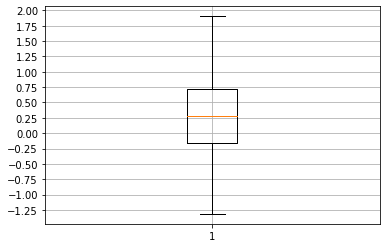

In [11]:
plt.yticks(np.arange(-3,3,0.25))
plt.grid(True)
plt.boxplot(data=db_train,x=db_train.x2)
plt.show()

In [12]:
x= db_train.drop(columns='target',axis=1)

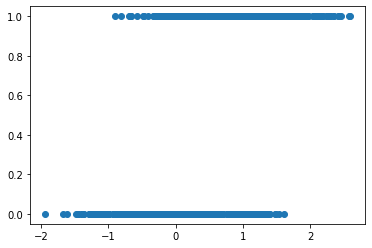

In [13]:
plt.scatter(db_train.x1,db_train.target)

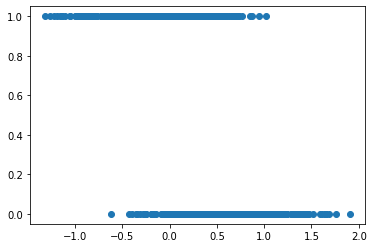

In [14]:
plt.scatter(db_train.x2,db_train.target)

# Logístic Regression Classifier

Começamos com um modelo simples, ja que a database é muito pequena, e o excesso de hiperparametros pode causar overfitting.

In [15]:
db_train = pd.read_csv('classification_train.csv')
db_test = pd.read_csv('classification_test.csv')

In [16]:
FEATURES = ['x1','x2']
TARGET = ['target']

In [17]:
X_train = db_train[FEATURES]

y_train = db_train[TARGET]

In [18]:
X_test = db_test[FEATURES]

y_test = db_test[TARGET]

Primeiro vamos com a variavel x1

In [19]:
from sklearn.linear_model import  LogisticRegression

lg = LogisticRegression()
lg.fit(X_train,y_train)

c:\Users\Ale\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [20]:
lg.score(X_test,y_test)

0.8333333333333334

In [21]:
y_pred = lg.predict(X_test)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       169
           1       0.82      0.85      0.83       161

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



In [23]:
lg.coef_

array([[ 1.13917931, -3.27820804]])

In [24]:
importances = pd.DataFrame(data=lg.coef_,
             columns=[FEATURES]).T

In [25]:
importances = importances.rename({0:'Importancia'},axis=1)

In [26]:
# A variável 'x2' é mais importante por ter um valor absoluto maior.
importances

,Importancia
x1,1.139179
x2,-3.278208


# Respondendo as perguntas

### A segunda variavel se sai melhor, tem um grado de influênca maior, a pesar de que é inversamente proporcional(por ser um coef negativo) <br>
#### Interpretando os resultados
Precision: Quando falamos de precision, falamos de especificidade, falsos positivos.  <br>
Recall: Quando falamos de recall, falamos de exhaustividade, verdadeiros positivos.<br>
f1-score: Uma pontuação de 0.74 nos da um bom balance entre o precision e o recall, podería ser maior, mas pelo menos a segunda variavel nos permite um modelo mais equilibrado em comparação a se usassemos a primeira variavel<br>
<br>
No caso da precision no momento de classificar um target como '0', se terão mais verdadeiros positivos, em comparação a falsos positivos, por outro lado, no momento de classificar o target como '1', se terão mais falsos verdadeiros. <br>
<br> 
O importante é ter bons indices de ambos... em um mundo ideal, mas na realidad não é possivel, pelo que geralmente optamos mais por um ou por outro, dependendo do contexto da data.<br>
<br>
Neste caso, como não sabemos o que estamos classificando, não podemos determinar qual das duas metricas sería mais importante, mas de qualquer jeito, ambas mostram índices muito bons. <br>
<br>
O que sabemos é que, teremos mais 'target's 1 que sabemos que serão verdadeiros 1, em comparação a 'target's que serão verdadeiros 0.

# Classificador mais robusto - Random Forest

In [27]:
db_train = pd.read_csv('classification_train.csv')
db_test = pd.read_csv('classification_test.csv')

In [28]:
FEATURES = ['x1','x2']
TARGET = ['target']

In [29]:
X_train = db_train[FEATURES]
y_train = db_train[TARGET]

X_test = db_test[FEATURES]
y_test = db_test[TARGET]

In [30]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [31]:
forest.fit(X_train,y_train)

C:\Users\Ale\AppData\Local\Temp\ipykernel_9592\3620249585.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)


RandomForestClassifier()

In [32]:
importances = forest.feature_importances_

### Podemos interpretar os resultados da mesma forma como interpretamos utilizando o primeiro modelo, mas aquí nos da maior nivel de segurança nas afirmações das interpretações, a pesar de que a diferença não é tanta assim

In [33]:
pd.DataFrame(data=forest.feature_importances_,
             index=forest.feature_names_in_,
             columns=['Importancia'])

,Importancia
x1,0.435612
x2,0.564388


In [34]:
from sklearn.metrics import classification_report
y_pred = forest.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       169
           1       0.86      0.87      0.86       161

    accuracy                           0.87       330
   macro avg       0.87      0.87      0.87       330
weighted avg       0.87      0.87      0.87       330



# Plus

### Machine learning Pipeline

Vamos a deixar por aquí uma forma de ver varias possibilidades.

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(GaussianNB())

In [36]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [37]:
db_train = pd.read_csv('classification_train.csv')
db_test = pd.read_csv('classification_test.csv')

In [38]:
x_train = db_train.drop(columns=['target'])
y_train = db_train['target']

In [39]:
x_test = db_test.drop(columns=['target'])
y_test = db_test['target']

In [40]:
model_list = ['SVM','KNN','Decision Tree','Naive Bayes']
acc_list =[]
auc_list = []
cm_list = []
f1_list = []
recall_list = []
precision_list =[]

for model in model_pipeline:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc_list.append(metrics.accuracy_score(y_test,y_pred))
    f1_list.append(metrics.f1_score(y_test,y_pred))
    recall_list.append(metrics.recall_score(y_test,y_pred))
    precision_list.append(metrics.precision_score(y_test,y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test,y_pred)
    auc_list.append(round(metrics.auc(fpr,tpr),2))
    cm_list.append(classification_report(y_test,y_pred))
    

In [41]:
resuld_df = pd.DataFrame({'Model':model_list,'Accuracy':acc_list,'AUC':auc_list,'Recall':recall_list,'Precision':precision_list,'F1_Score':f1_list})
resuld_df

,Model,Accuracy,AUC,Recall,Precision,F1_Score
0,SVM,0.875758,0.88,0.894410,0.857143,0.875380
1,KNN,0.872727,0.87,0.875776,0.865031,0.870370
2,Decision Tree,0.818182,0.82,0.819876,0.809816,0.814815
3,Naive Bayes,0.836364,0.84,0.844720,0.824242,0.834356


Aparentemente o modelo de SVM é o que melhor se adapta quando procuramos classificar o target, o que faz bastante sentido ja que si consideramos o range de valores positivos e negativos entre as variaveis, o SVM é bastante adequado para a situação como esta.